In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')

In [21]:
%matplotlib inline

In [6]:
from datetime import datetime
from pandas_datareader import data 

In [7]:
stock_list = ['AAPL','GOOG','AMZN','MSFT']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [14]:
for stock in stock_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [15]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-02,107.699997,108.000000,106.820000,107.730003,105.862648,26802500
2016-09-06,107.900002,108.300003,107.510002,107.699997,105.833153,26880400
2016-09-07,107.830002,108.760002,107.070000,108.360001,106.481720,42364300
2016-09-08,107.250000,107.269997,105.239998,105.519997,103.690956,53002000
2016-09-09,104.639999,105.720001,103.129997,103.129997,101.342369,46557000


In [16]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-02,773.010010,773.919983,768.409973,771.460022,771.460022,1072700
2016-09-06,773.450012,782.000000,771.000000,780.080017,780.080017,1442800
2016-09-07,780.000000,782.729980,776.200012,780.349976,780.349976,893700
2016-09-08,778.590027,780.349976,773.580017,775.320007,775.320007,1270300
2016-09-09,770.099976,773.244995,759.659973,759.659973,759.659973,1885500


In [17]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,849.509523,854.742308,843.778081,849.639564,849.639564,1.565572e+06
std,70.958221,71.275352,70.335868,71.101041,71.101041,6.680027e+05
min,744.590027,754.000000,727.539978,736.080017,736.080017,5.874000e+05
25%,787.552475,792.625000,783.800003,788.755021,788.755021,1.132750e+06
50%,827.175018,830.929993,823.325012,828.355011,828.355011,1.392600e+06
75%,925.847519,930.945023,918.330001,926.970017,926.970017,1.752625e+06
max,984.500000,988.250000,977.200012,983.679993,983.679993,4.745200e+06


In [18]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-09-02 to 2017-09-01
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


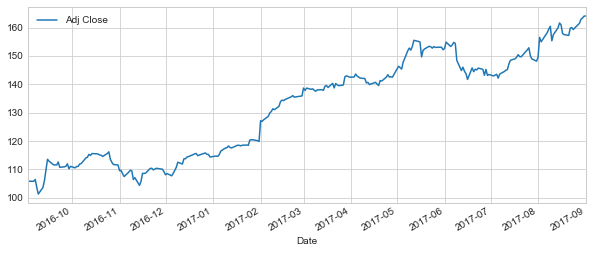

In [22]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

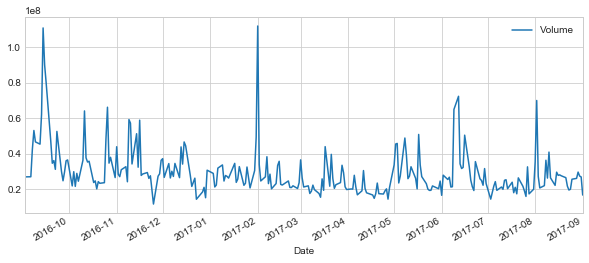

In [23]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [27]:
AAPL['ma_10'] = AAPL['Adj Close'].rolling(center=False,window=10).mean()
AAPL['ma_20'] = AAPL['Adj Close'].rolling(center=False,window=20).mean()
AAPL['ma_50'] = AAPL['Adj Close'].rolling(center=False,window=50).mean()

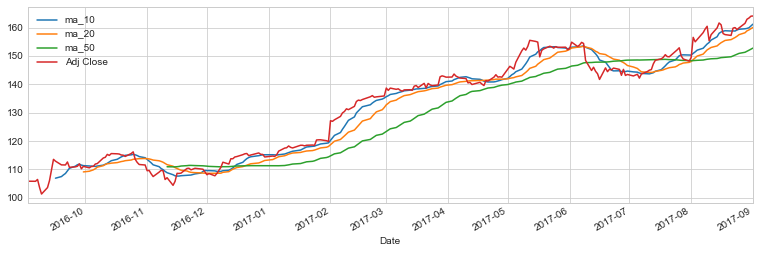

In [31]:
AAPL[['ma_10','ma_20','ma_50','Adj Close']].plot(subplots=False,figsize=(13,4))

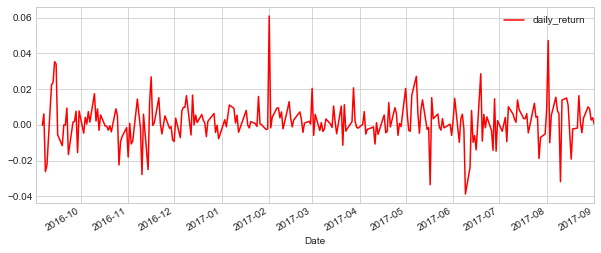

In [33]:
AAPL['daily_return'] = AAPL['Adj Close'].pct_change()
AAPL['daily_return'].plot(figsize=(10,4),legend=True,color='red')

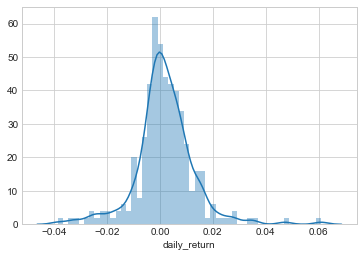

In [37]:
 sns.distplot(AAPL['daily_return'].dropna(),bins=50,kde=True)

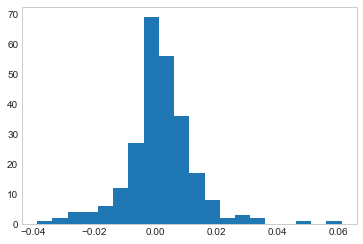

In [39]:
AAPL['daily_return'].hist(bins=20,grid=False)

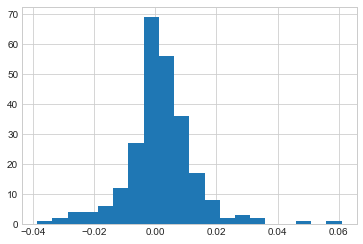

In [40]:
AAPL['daily_return'].hist(bins=20)

In [41]:
closing_df = data.DataReader(stock_list,'yahoo',start,end)['Adj Close']

In [42]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-09-01,164.050003,978.250000,937.340027,73.940002
2017-08-31,164.000000,980.599976,939.330017,74.769997
2017-08-30,163.350006,967.590027,929.570007,74.010002
2017-08-29,162.910004,954.059998,921.289978,73.050003
2017-08-28,161.470001,946.020020,913.809998,72.830002


In [43]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-09-01,NaN,NaN,NaN,NaN
2017-08-31,-0.000305,0.002402,0.002123,0.011225
2017-08-30,-0.003963,-0.013267,-0.010390,-0.010164
2017-08-29,-0.002694,-0.013983,-0.008907,-0.012971
2017-08-28,-0.008839,-0.008427,-0.008119,-0.003012


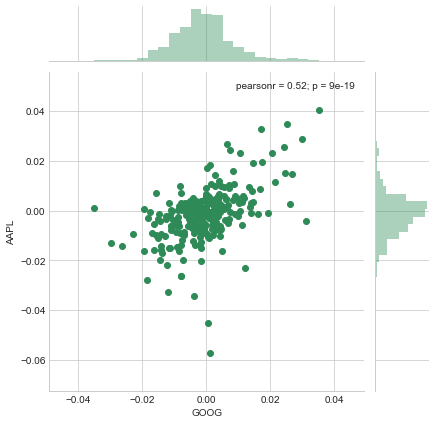

In [44]:
sns.jointplot('GOOG','AAPL',data=tech_rets,kind='scatter',color='seagreen')

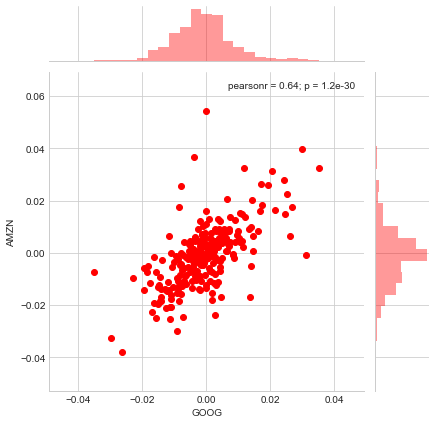

In [46]:
sns.jointplot('GOOG','AMZN',data=tech_rets,kind='scatter',color='red')

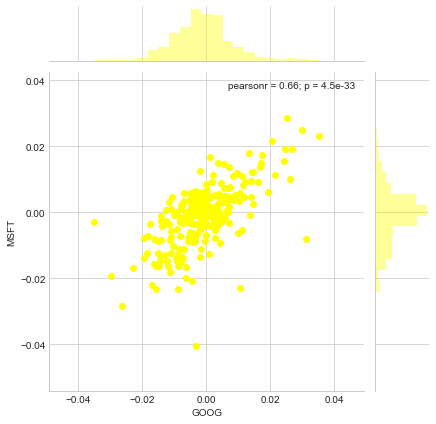

In [49]:
sns.jointplot('GOOG','MSFT',data=tech_rets,kind='scatter',color='yellow')

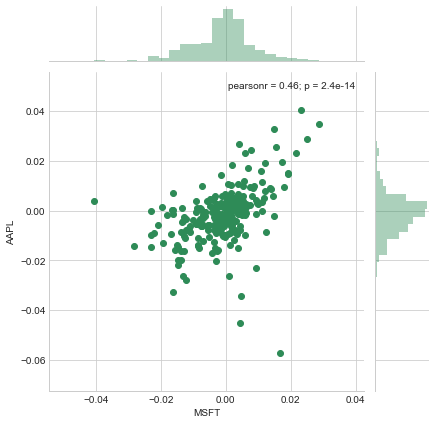

In [50]:
sns.jointplot('MSFT','AAPL',data=tech_rets,kind='scatter',color='seagreen')

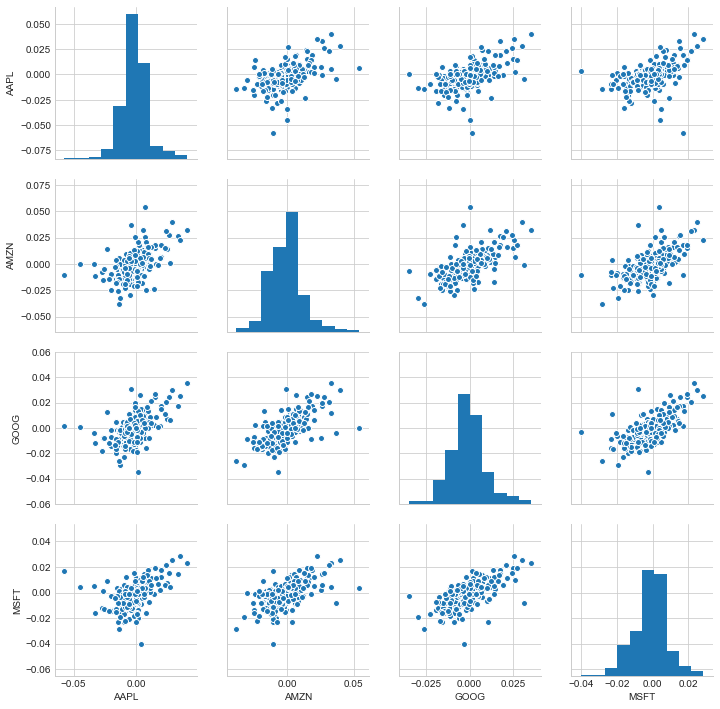

In [52]:
sns.pairplot(tech_rets.dropna(),palette='summer')

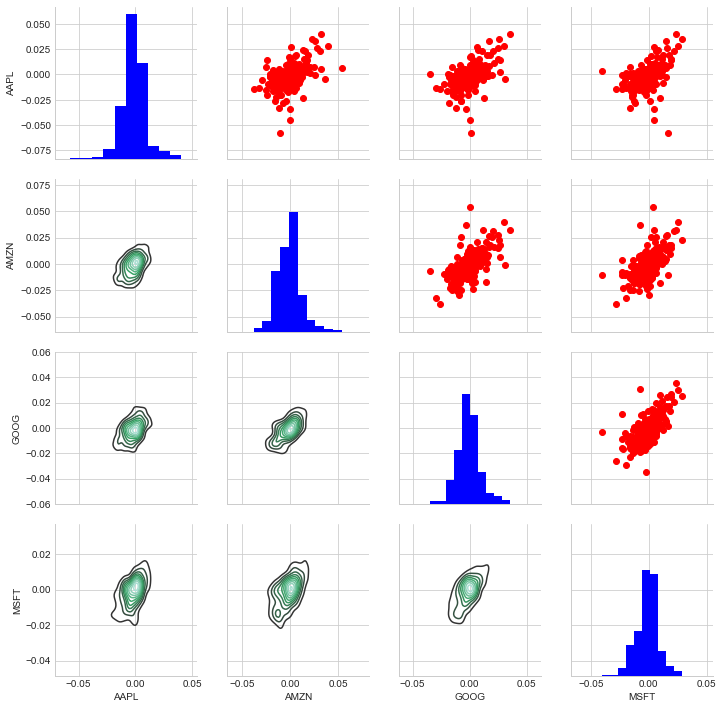

In [55]:
fig = sns.PairGrid(tech_rets.dropna(),palette='summer')
fig.map_upper(plt.scatter,color='red')
fig.map_lower(sns.kdeplot,color='green')
fig.map_diag(plt.hist,color='blue')

In [59]:
# Compute the correlation matrix
corr = tech_rets.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [60]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)  

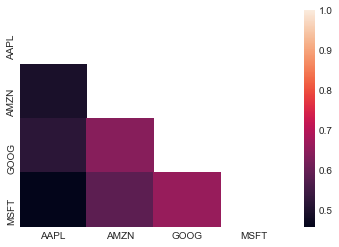

In [62]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask)